In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("test").getOrCreate()
spark

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pyspark import SparkContext
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SQLContext

%matplotlib inline


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py


In [ ]:
data_df = spark.read.csv("/content/drive/MyDrive/Mall_Customers.csv",inferSchema =True,header = True)
data_df.show()

+----------+------+---+------------------+----------------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
|         6|Female| 22|                17|                    76|
|         7|Female| 35|                18|                     6|
|         8|Female| 23|                18|                    94|
|         9|  Male| 64|                19|                     3|
|        10|Female| 30|                19|                    72|
|        11|  Male| 67|                19|                    14|
|        12|Female| 35|                19|                    99|
|        1

In [ ]:
data_df.columns

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [ ]:
x = data_df.select("Annual Income (k$)","Spending Score (1-100)")
x1= x.toPandas()
x1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


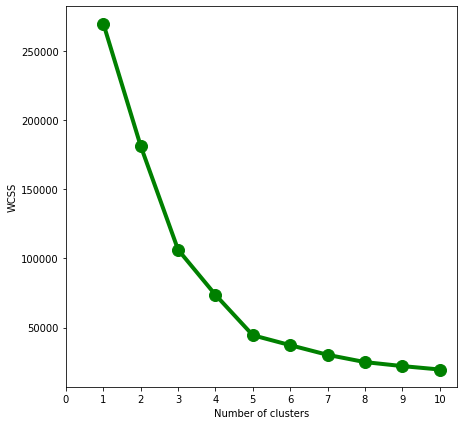

In [ ]:
#find the optimal number of clusters using elbow method
from sklearn.cluster import KMeans
  
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x1)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()  

In [ ]:

model = KMeans(n_clusters = 5, init = "k-means++")
k_means = model.fit(x1)

k_means.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

In [ ]:
x1['clusters']  = k_means.labels_
x1.head() 

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2


In [ ]:
x1['clusters'].value_counts()

0    81
3    39
1    35
2    23
4    22
Name: clusters, dtype: int64

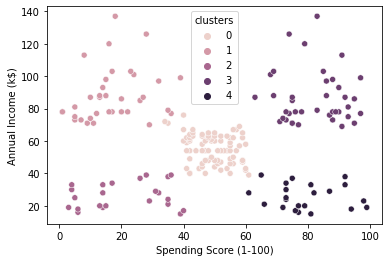

In [ ]:
sns.scatterplot(x='Spending Score (1-100)',y='Annual Income (k$)',hue='clusters',data=x1)